# Q 9 Plot all train routes on a map.

In [1]:
import src.data_processing.data as data
import matplotlib.pyplot as plt

In [2]:
provinces = data.provinces
stations = data.stations
stations['name'] = stations['name'].str.lower()
sporen = data.sporen
trips = data.full_trips

We can use the trails dataset from Infrabel

<AxesSubplot: >

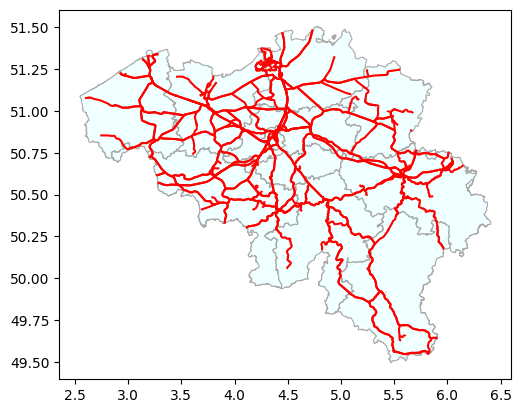

In [3]:
ax = sporen.plot(color ='red')
provinces.plot( linewidth=0.8, ax=ax, color = "#F0FFFF", edgecolor = "darkgrey")

We can also use the trips datasets (slightly different results)

In [4]:
trips=trips.merge(stations, left_on = "Name of the stop", right_on = "name")


In [5]:
train_numbers = trips["Train number"].unique()
routes = {}
for train_number in train_numbers:
    routes[train_number] = trips[trips["Train number"] == train_number].sort_values(by= [ "Time of real departure"])
for train_number in train_numbers:
    routes[train_number] = routes[train_number].merge(stations, left_on = "Name of the stop", right_on = "name").sort_values(by= [ "Time of real departure"])


In [6]:
routes_by_day = {}
for train_number in train_numbers:
    routes_by_day[train_number] = [group for _, group in routes[train_number].groupby("Date of departure")]


Routes on just one day

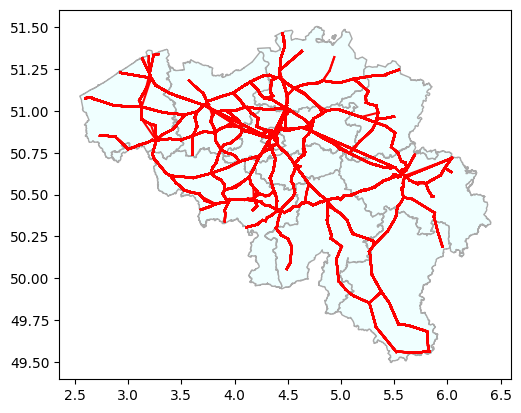

In [7]:
fig, ax = plt.subplots()
data.provinces.plot(ax=ax, color = "#F0FFFF", edgecolor = "darkgrey")
for train_number in train_numbers:
    plt.plot([routes_by_day.get(train_number)[0].iloc[:-1]["longitude_x"], routes_by_day.get(train_number)[0].iloc[1:]["longitude_x"]], [routes_by_day.get(train_number)[0].iloc[:-1]["latitude_x"], routes_by_day.get(train_number)[0].iloc[1:]["latitude_x"]], color = "red")


Routes of all days

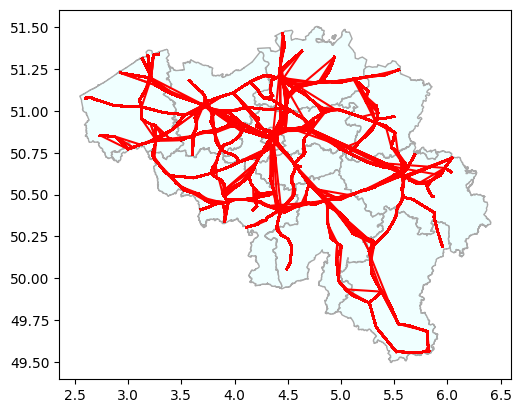

In [8]:
fig, ax = plt.subplots()
data.provinces.plot(ax=ax, color = "#F0FFFF", edgecolor = "darkgrey")
for route in list(routes_by_day.values()):
    for day_route in route:
        plt.plot(day_route["longitude_x"], day_route["latitude_x"], color = "Red")
plt.show()
